In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import seaborn as sns
from sentistrength import PySentiStr
from textblob import TextBlob
import textstat

/Users/chenluqi/anaconda3/envs/ml1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
rawdata = pd.read_csv("df_combine2.csv")
rawdata  = rawdata.iloc[:,1:]
rawdata.head(10)

,created_at,retweet_count,favorite_count,text
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"b'The good, the bad, and the ugly side of havi..."
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"b'In the Albanian capital of Tirana, the count..."
2,Mon Sep 09 02:50:02 +0000 2019,22,97,b'The 17 Democratic candidates who are lagging...
3,Mon Sep 09 02:49:40 +0000 2019,4898,0,"b""RT @npfandos: NEW: I got ahold of a draft co..."
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"b""President Trump's plan to secretly meet with..."
5,Mon Sep 09 02:03:50 +0000 2019,86,0,"b'RT @TheWeekly: Estonia, a small European dem..."
6,Mon Sep 09 02:01:14 +0000 2019,21,0,b'RT @TheWeekly: Were live! Watch #TheWeeklyNY...
7,Mon Sep 09 01:43:04 +0000 2019,686,0,b'RT @mattbpurdy: How Trumps high-risk gambit ...
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"b""For Paul Eng, trying to recreate his family'..."
9,Mon Sep 09 01:11:58 +0000 2019,601,2934,b'Breaking News: Rafael Nadal has defeated Dan...


In [3]:
# Delete retweets and get rid of the "b" in every text
rawdata['is_retweet'] = np.where(rawdata.text.str.startswith('b"RT'), 'Yes', 
                                 np.where(rawdata.text.str.startswith("b'RT"), 'Yes', 'No'))
rawdata.head(10)

,created_at,retweet_count,favorite_count,text,is_retweet
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"b'The good, the bad, and the ugly side of havi...",No
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"b'In the Albanian capital of Tirana, the count...",No
2,Mon Sep 09 02:50:02 +0000 2019,22,97,b'The 17 Democratic candidates who are lagging...,No
3,Mon Sep 09 02:49:40 +0000 2019,4898,0,"b""RT @npfandos: NEW: I got ahold of a draft co...",Yes
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"b""President Trump's plan to secretly meet with...",No
5,Mon Sep 09 02:03:50 +0000 2019,86,0,"b'RT @TheWeekly: Estonia, a small European dem...",Yes
6,Mon Sep 09 02:01:14 +0000 2019,21,0,b'RT @TheWeekly: Were live! Watch #TheWeeklyNY...,Yes
7,Mon Sep 09 01:43:04 +0000 2019,686,0,b'RT @mattbpurdy: How Trumps high-risk gambit ...,Yes
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"b""For Paul Eng, trying to recreate his family'...",No
9,Mon Sep 09 01:11:58 +0000 2019,601,2934,b'Breaking News: Rafael Nadal has defeated Dan...,No


In [4]:
data = rawdata[rawdata.is_retweet == "No"]
data.head(10)

,created_at,retweet_count,favorite_count,text,is_retweet
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"b'The good, the bad, and the ugly side of havi...",No
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"b'In the Albanian capital of Tirana, the count...",No
2,Mon Sep 09 02:50:02 +0000 2019,22,97,b'The 17 Democratic candidates who are lagging...,No
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"b""President Trump's plan to secretly meet with...",No
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"b""For Paul Eng, trying to recreate his family'...",No
9,Mon Sep 09 01:11:58 +0000 2019,601,2934,b'Breaking News: Rafael Nadal has defeated Dan...,No
10,Mon Sep 09 01:01:23 +0000 2019,251,475,"b'In Fashionopolis, Dana Thomas, a veteran sty...",No
11,Mon Sep 09 00:30:04 +0000 2019,36,233,b'This flexible soba noodle dish also works we...,No
12,Mon Sep 09 00:00:03 +0000 2019,311,1005,b'A dramatic revolt by British Conservative Pa...,No
13,Sun Sep 08 23:15:20 +0000 2019,44,185,b'The bag is to Berlin what a New Yorker tote ...,No


In [5]:
data["text"]=data["text"].str[1:]
data  = data.drop(['is_retweet'], axis=1)
data.head(10)

/Users/chenluqi/anaconda3/envs/ml1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,created_at,retweet_count,favorite_count,text
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"'The good, the bad, and the ugly side of havin..."
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"'In the Albanian capital of Tirana, the countr..."
2,Mon Sep 09 02:50:02 +0000 2019,22,97,'The 17 Democratic candidates who are lagging ...
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"""President Trump's plan to secretly meet with ..."
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"""For Paul Eng, trying to recreate his family's..."
9,Mon Sep 09 01:11:58 +0000 2019,601,2934,'Breaking News: Rafael Nadal has defeated Dani...
10,Mon Sep 09 01:01:23 +0000 2019,251,475,"'In Fashionopolis, Dana Thomas, a veteran styl..."
11,Mon Sep 09 00:30:04 +0000 2019,36,233,'This flexible soba noodle dish also works wel...
12,Mon Sep 09 00:00:03 +0000 2019,311,1005,'A dramatic revolt by British Conservative Par...
13,Sun Sep 08 23:15:20 +0000 2019,44,185,'The bag is to Berlin what a New Yorker tote i...


In [6]:
# Use the preprocessor package to get rid of the hashtags, URLs, mentions
def clean_tweet(row):
    mylist = row['text']
    cleaned_list = p.clean(mylist)
    return cleaned_list
data["clean_text_1"]= data.apply(clean_tweet,axis=1)
data.head()

,created_at,retweet_count,favorite_count,text,clean_text_1
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"'The good, the bad, and the ugly side of havin...","'The good, the bad, and the ugly side of havin..."
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"'In the Albanian capital of Tirana, the countr...","'In the Albanian capital of Tirana, the countr..."
2,Mon Sep 09 02:50:02 +0000 2019,22,97,'The 17 Democratic candidates who are lagging ...,'The Democratic candidates who are lagging beh...
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"""President Trump's plan to secretly meet with ...","""President Trump's plan to secretly meet with ..."
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"""For Paul Eng, trying to recreate his family's...","""For Paul Eng, trying to recreate his family's..."


In [7]:
# Get rid of the "\nhttps://'" thing at the end of the text
for index,row in data.iterrows():
    if row["clean_text_1"].endswith('\\nhttps://\''):
        data.loc[index,"clean_text"]= row["clean_text_1"][:-11]
    elif row["clean_text_1"].endswith('\\nhttps://\"'):
        data.loc[index,"clean_text"]= row["clean_text_1"][:-11]
    else:
        data.loc[index,"clean_text"]= row["clean_text_1"]

data  = data.drop(['clean_text_1'], axis=1)
data.head(10)

,created_at,retweet_count,favorite_count,text,clean_text
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"'The good, the bad, and the ugly side of havin...","'The good, the bad, and the ugly side of havin..."
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"'In the Albanian capital of Tirana, the countr...","'In the Albanian capital of Tirana, the countr..."
2,Mon Sep 09 02:50:02 +0000 2019,22,97,'The 17 Democratic candidates who are lagging ...,'The Democratic candidates who are lagging beh...
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"""President Trump's plan to secretly meet with ...","""President Trump's plan to secretly meet with ..."
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"""For Paul Eng, trying to recreate his family's...","""For Paul Eng, trying to recreate his family's..."
9,Mon Sep 09 01:11:58 +0000 2019,601,2934,'Breaking News: Rafael Nadal has defeated Dani...,'Breaking News: Rafael Nadal has defeated Dani...
10,Mon Sep 09 01:01:23 +0000 2019,251,475,"'In Fashionopolis, Dana Thomas, a veteran styl...","'In Fashionopolis, Dana Thomas, a veteran styl..."
11,Mon Sep 09 00:30:04 +0000 2019,36,233,'This flexible soba noodle dish also works wel...,'This flexible soba noodle dish also works wel...
12,Mon Sep 09 00:00:03 +0000 2019,311,1005,'A dramatic revolt by British Conservative Par...,'A dramatic revolt by British Conservative Par...
13,Sun Sep 08 23:15:20 +0000 2019,44,185,'The bag is to Berlin what a New Yorker tote i...,'The bag is to Berlin what a New Yorker tote i...


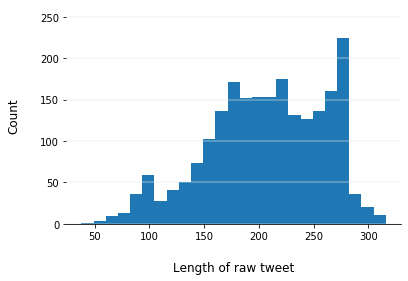

In [8]:
# Add length as a new column
for lab, row in data.iterrows():
    data.loc[lab,'length']=len(row['text'])

#fig = plt.figure(figsize=(10,5))
ax=data.hist(column="length",bins=25, grid=False)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color="#E0EEEE", zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Length of raw tweet", labelpad=20,size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, size=12)

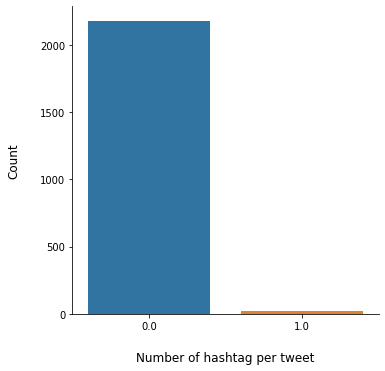

In [9]:
# Add hashtag as a new column
for index,row in data.iterrows():
    data.loc[index,"hashtag"]= row["text"].count("#")

s = sns.catplot(x="hashtag",kind="count",data=data)
axes = s.axes.flatten()
axes[0].set_ylabel("Count",labelpad=20,size=12)
for ax in axes:
    ax.set_xlabel("Number of hashtag per tweet",labelpad=20,size=12)

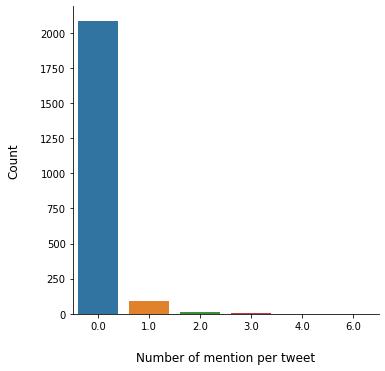

In [10]:
# Add mention as a new column
for index,row in data.iterrows():
    data.loc[index,"mention"]= row["text"].count("@")

s = sns.catplot(x="mention",kind="count",data=data)
axes = s.axes.flatten()
axes[0].set_ylabel("Count",labelpad=20,size=12)
for ax in axes:
    ax.set_xlabel("Number of mention per tweet",labelpad=20,size=12)

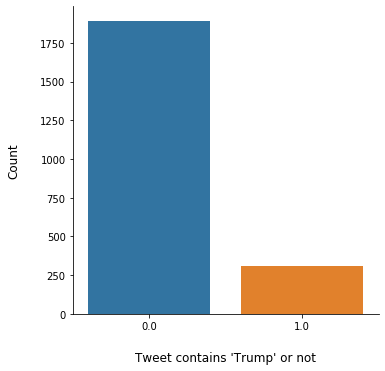

In [11]:
# Add president as a new column
for index,row in data.iterrows():
    if "Trump" in row["text"]:
        data.loc[index,"president"]= 1
    else:
        data.loc[index,"president"]= 0

s = sns.catplot(x="president",kind="count",data=data)
axes = s.axes.flatten()
axes[0].set_ylabel("Count",labelpad=20,size=12)
for ax in axes:
    ax.set_xlabel("Tweet contains 'Trump' or not",labelpad=20,size=12)

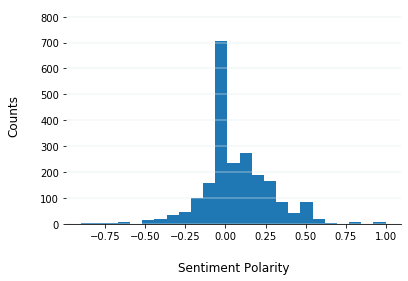

In [12]:
# Add sentiment as a new column
for index,row in data.iterrows():
    data.loc[index,"sentiment"]= TextBlob(row["clean_text"]).sentiment.polarity

ax=data.hist(column="sentiment",bins=25, grid=False)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color="#E0EEEE", zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Sentiment Polarity", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, size=12)

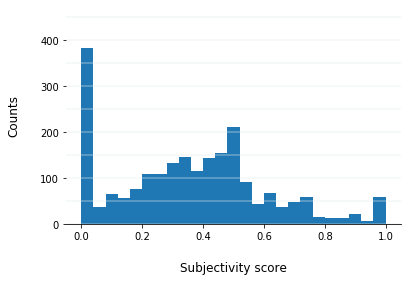

In [13]:
# Add subjectivity as a new column
for index,row in data.iterrows():
    data.loc[index,"subjectivity"]= TextBlob(row["clean_text"]).sentiment.subjectivity

ax=data.hist(column="subjectivity",bins=25, grid=False)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color="#E0EEEE", zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Subjectivity score", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, size=12)

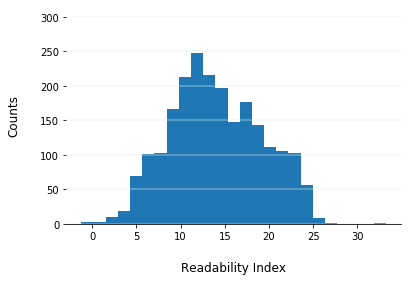

In [14]:
# Add readability as a new column
#automated_readability_index returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text.
#For example if the ARI is 6.5, then the grade level to comprehend the text is 6th to 7th grade.

for index,row in data.iterrows():
    data.loc[index,"readability"]= textstat.automated_readability_index(row["clean_text"])

ax=data.hist(column="readability",bins=25, grid=False)
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color="#E0EEEE", zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Readability Index", labelpad=20, size=12)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, size=12)

In [15]:
data.head()

,created_at,retweet_count,favorite_count,text,clean_text,length,hashtag,mention,president,sentiment,subjectivity,readability
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"'The good, the bad, and the ugly side of havin...","'The good, the bad, and the ugly side of havin...",105.0,0.0,0.0,0.0,-0.233333,0.755556,5.1
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"'In the Albanian capital of Tirana, the countr...","'In the Albanian capital of Tirana, the countr...",115.0,0.0,0.0,0.0,0.216667,0.358333,11.8
2,Mon Sep 09 02:50:02 +0000 2019,22,97,'The 17 Democratic candidates who are lagging ...,'The Democratic candidates who are lagging beh...,180.0,0.0,0.0,0.0,-0.050000,0.600000,17.3
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"""President Trump's plan to secretly meet with ...","""President Trump's plan to secretly meet with ...",154.0,0.0,0.0,1.0,-0.100000,0.650000,12.2
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"""For Paul Eng, trying to recreate his family's...","""For Paul Eng, trying to recreate his family's...",277.0,0.0,0.0,0.0,0.166667,0.333333,12.4


In [16]:
data['retweet_count'].median()

81.5

In [17]:
data['favorite_count'].median()

228.5

In [18]:
# Add 'retweet>100' and favorite>200'
data['retweet>100'] = np.where(data.retweet_count >100,1,0)
data['favorite>200'] = np.where(data.favorite_count >200,1,0)

In [19]:
data.head()

,created_at,retweet_count,favorite_count,text,clean_text,length,hashtag,mention,president,sentiment,subjectivity,readability,retweet>100,favorite>200
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"'The good, the bad, and the ugly side of havin...","'The good, the bad, and the ugly side of havin...",105.0,0.0,0.0,0.0,-0.233333,0.755556,5.1,0,0
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"'In the Albanian capital of Tirana, the countr...","'In the Albanian capital of Tirana, the countr...",115.0,0.0,0.0,0.0,0.216667,0.358333,11.8,0,0
2,Mon Sep 09 02:50:02 +0000 2019,22,97,'The 17 Democratic candidates who are lagging ...,'The Democratic candidates who are lagging beh...,180.0,0.0,0.0,0.0,-0.050000,0.600000,17.3,0,0
4,Mon Sep 09 02:32:03 +0000 2019,247,531,"""President Trump's plan to secretly meet with ...","""President Trump's plan to secretly meet with ...",154.0,0.0,0.0,1.0,-0.100000,0.650000,12.2,1,1
8,Mon Sep 09 01:24:51 +0000 2019,116,621,"""For Paul Eng, trying to recreate his family's...","""For Paul Eng, trying to recreate his family's...",277.0,0.0,0.0,0.0,0.166667,0.333333,12.4,1,1


In [20]:
data.to_csv("smalldata.csv")

## Add TF-IDF as feature

In [21]:
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
data['words']=data.clean_text.str.strip().str.split('[\W_]+')

In [23]:
textlist=[]
for index,row in data.iterrows():
    textlist.append(row["words"])

In [24]:
import string
from nltk.corpus import stopwords

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenluqi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def remove (eglist):
    ### Remove punctuation
    eglist1 = [''.join(c for c in s if c not in string.punctuation) for s in eglist]
    eglist2 = [s for s in eglist1 if s]
    ### Remove stops words
    eglist3 = [word for word in eglist2 if word.lower() not in stopwords.words('english')]
    ### Remove those which are not alphabetic
    eglist4 = [item for item in eglist3 if item.isalpha()]
    ### Lower the words
    lowered_list = [word.lower()for word in eglist4]
    ### Stem the words
    Stemmed_list = [PorterStemmer().stem(word)for word in lowered_list]
    return Stemmed_list

In [27]:
newtextlist=[]
for text in textlist:
    newtext = remove(text)
    newtextlist.append(newtext)

In [28]:
stringlist =[]
for item in newtextlist:
    s = ''
    for word in item:
        s = s + " " + word
    stringlist.append(s)

In [29]:
stringlist[2]

' democrat candid lag behind front runner presidenti race grasp fresh way distinguish'

In [30]:
len(stringlist)

2200

In [31]:
vectorizer = TfidfVectorizer(ngram_range=(1,1)) 

In [32]:
tfidfdata = vectorizer.fit_transform(stringlist)

In [33]:
tfidflist = tfidfdata.toarray().tolist()

In [34]:
df = pd.DataFrame(tfidflist)

In [35]:
df.columns = vectorizer.get_feature_names()

In [36]:
df.head()

,aaron,abaco,abandon,abbey,abc,abdel,abduct,abdul,abdulaziz,abe,...,zest,zhang,zimbabw,zimdancehal,zine,zoltan,zombi,zone,zoo,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df.shape

(2200, 6817)

In [38]:
data.shape

(2200, 15)

In [39]:
data_withTFIDF = pd.concat([data.set_index(df.index), df], axis=1,sort=False)

In [40]:
data_withTFIDF.head(10)

,created_at,retweet_count,favorite_count,text,clean_text,length,hashtag,mention,president,sentiment,...,zest,zhang,zimbabw,zimdancehal,zine,zoltan,zombi,zone,zoo,zuckerberg
0,Mon Sep 09 03:37:47 +0000 2019,36,152,"'The good, the bad, and the ugly side of havin...","'The good, the bad, and the ugly side of havin...",105.0,0.0,0.0,0.0,-0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mon Sep 09 03:10:13 +0000 2019,43,163,"'In the Albanian capital of Tirana, the countr...","'In the Albanian capital of Tirana, the countr...",115.0,0.0,0.0,0.0,0.216667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mon Sep 09 02:50:02 +0000 2019,22,97,'The 17 Democratic candidates who are lagging ...,'The Democratic candidates who are lagging beh...,180.0,0.0,0.0,0.0,-0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mon Sep 09 02:32:03 +0000 2019,247,531,"""President Trump's plan to secretly meet with ...","""President Trump's plan to secretly meet with ...",154.0,0.0,0.0,1.0,-0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mon Sep 09 01:24:51 +0000 2019,116,621,"""For Paul Eng, trying to recreate his family's...","""For Paul Eng, trying to recreate his family's...",277.0,0.0,0.0,0.0,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Mon Sep 09 01:11:58 +0000 2019,601,2934,'Breaking News: Rafael Nadal has defeated Dani...,'Breaking News: Rafael Nadal has defeated Dani...,143.0,0.0,0.0,0.0,0.325000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Mon Sep 09 01:01:23 +0000 2019,251,475,"'In Fashionopolis, Dana Thomas, a veteran styl...","'In Fashionopolis, Dana Thomas, a veteran styl...",272.0,0.0,0.0,0.0,0.140000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Mon Sep 09 00:30:04 +0000 2019,36,233,'This flexible soba noodle dish also works wel...,'This flexible soba noodle dish also works wel...,141.0,0.0,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Mon Sep 09 00:00:03 +0000 2019,311,1005,'A dramatic revolt by British Conservative Par...,'A dramatic revolt by British Conservative Par...,281.0,0.0,0.0,1.0,-0.083810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Sun Sep 08 23:15:20 +0000 2019,44,185,'The bag is to Berlin what a New Yorker tote i...,'The bag is to Berlin what a New Yorker tote i...,230.0,0.0,0.0,0.0,0.151515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data_withTFIDF.to_csv("bigdata.csv")

/Users/chenluqi/anaconda3/envs/ml1/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


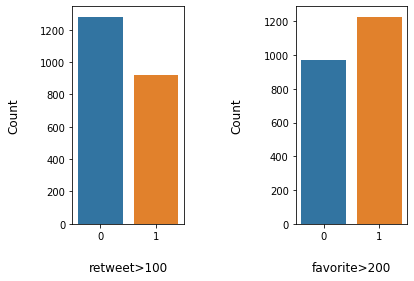

In [43]:
fig, ax =plt.subplots(1,2)
plt.subplots_adjust(wspace = 1.0)
#plt.figure(figsize=(10,8))
sns.countplot(data_withTFIDF['retweet>100'], ax=ax[0]) 
ax[0].set_ylabel("Count",labelpad=20,size=12)
ax[0].set_xlabel("retweet>100",labelpad=20,size=12)
sns.countplot(data_withTFIDF['favorite>200'], ax=ax[1])
ax[1].set_ylabel("Count",labelpad=20,size=12)
ax[1].set_xlabel("favorite>200",labelpad=20,size=12)
fig.show()